In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

Pandas was developed in the context of financial modeling, so as you might expect, it
contains a fairly extensive set of tools for working with dates, times, and time-
indexed data. Date and time data comes in a few flavors, which we will discuss here:

+ Time stamps reference particular moments in time (e.g., July 4th, 2015, at 7:00
a.m.)
+ Time intervals and periods reference a length of time between a particular begin‐
ning and end point—for example, the year 2015. Periods usually reference a spe‐
cial case of time intervals in which each interval is of uniform length and does
not overlap (e.g., 24 hour-long periods constituting days).
+ Time deltas or durations reference an exact length of time (e.g., a duration of
22.56 seconds).

# Dates and Times in Python

The Python world has a number of available representations of dates, times, deltas,
and timespans. While the time series tools provided by Pandas tend to be the most
useful for data science applications, it is helpful to see their relationship to other
packages used in Python.

### Native Python dates and times: datetime and dateutil

In [3]:
from datetime import datetime

In [4]:
# you can manually build a date using the datetime type:
datetime(year=2020,month=12,day=4)

datetime.datetime(2020, 12, 4, 0, 0)

In [5]:
# Or, using the dateutil module, you can parse dates from a variety of string formats:
from dateutil import parser

date = parser.parse("2020 Dec 4th")
date

datetime.datetime(2020, 12, 4, 0, 0)

In [6]:
# Once you have a datetime object, you can do things like printing the day of the week:
date.strftime("%A")

'Friday'

### Typed arrays of times: NumPy’s datetime64

The weaknesses of Python’s datetime format inspired the NumPy team to add a set of
native time series data type to NumPy. The datetime64 dtype encodes dates as 64-bit
integers, and thus allows arrays of dates to be represented very compactly. The date
time64 requires a very specific input format:

In [7]:
import numpy as np

date = np.array("2020-12-04", dtype=np.datetime64)

date

array('2020-12-04', dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations
on it

In [8]:
date + np.arange(10)

array(['2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07',
       '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11',
       '2020-12-12', '2020-12-13'], dtype='datetime64[D]')

NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

In [9]:
np.datetime64("2020-12-04")

numpy.datetime64('2020-12-04')

Here is a minute-based datetime:

In [10]:
np.datetime64("2020-12-04 23:04:17")

numpy.datetime64('2020-12-04T23:04:17')

Notice that the time zone is automatically set to the local time on the computer exe‐
cuting the code. You can force any desired fundamental unit using one of many for‐
mat codes; for example, here we’ll force a nanosecond-based time

## Dates and times in Pandas: Best of both worlds

In [11]:
import pandas as pd 

date= pd.to_datetime("2020 Dec 4th")

date.strftime("%A")

'Friday'

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [12]:
date + pd.to_timedelta(np.arange(12),"D")

DatetimeIndex(['2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07',
               '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11',
               '2020-12-12', '2020-12-13', '2020-12-14', '2020-12-15'],
              dtype='datetime64[ns]', freq=None)

# Pandas Time Series: Indexing by Time

In [13]:
index = pd.DatetimeIndex(['2020-12-04','2020-12-07','2020-12-11','2020-12-15'])
data = pd.Series(np.random.randint(0,10,4),index=index)

data

2020-12-04    8
2020-12-07    6
2020-12-11    2
2020-12-15    4
dtype: int64

In [14]:
data["2020-12-04" : "2020-12-11"]

2020-12-04    8
2020-12-07    6
2020-12-11    2
dtype: int64

# Pandas Time Series Data Structure

* For time stamps, Pandas provides the Timestamp type. As mentioned before, it is
essentially a replacement for Python’s native datetime , but is based on the more
efficient numpy.datetime64 data type. The associated index structure is
DatetimeIndex .
* For time periods, Pandas provides the Period type. This encodes a fixed frequency interval based on numpy.datetime64 . The associated index structure is PeriodIndex .
* For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a
more efficient replacement for Python’s native datetime.timedelta type, and is
based on numpy.timedelta64 . The associated index structure is TimedeltaIndex


The most fundamental of these date/time objects are the Timestamp and DatetimeIn
dex objects. While these class objects can be invoked directly, it is more common to
use the pd.to_datetime() function, which can parse a wide variety of formats. Pass‐
ing a single date to pd.to_datetime() yields a Timestamp ; passing a series of dates by
default yields a DatetimeIndex :

In [15]:
dates= pd.to_datetime([datetime(2020,12,4), "6th of Dec, 2020", "20-12-2020", "24-12-2020", "1st Jan, 2021"])

dates

DatetimeIndex(['2020-12-04', '2020-12-06', '2020-12-20', '2020-12-24',
               '2021-01-01'],
              dtype='datetime64[ns]', freq=None)

In [16]:
dates.strftime("%A")

Index(['Friday', 'Sunday', 'Sunday', 'Thursday', 'Friday'], dtype='object')

A TimedeltaIndex is created, for example, when one date is subtracted from another:

In [17]:
dates - dates[0]

TimedeltaIndex(['0 days', '2 days', '16 days', '20 days', '28 days'], dtype='timedelta64[ns]', freq=None)

## Regular sequences: pd.date_range()
To make the creation of regular date sequences more convenient, Pandas offers a few
functions for this purpose: pd.date_range() for timestamps, pd.period_range() for
periods, and pd.timedelta_range() for time deltas. We’ve seen that Python’s range() and NumPy’s np.arange() turn a startpoint, endpoint, and optional stepsize
into a sequence. Similarly, pd.date_range() accepts a start date, an end date, and an
optional frequency code to create a regular sequence of dates. By default, the fre‐
quency is one day:

In [18]:
pd.date_range("2020-12-04", "2020-12-12")

DatetimeIndex(['2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07',
               '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11',
               '2020-12-12'],
              dtype='datetime64[ns]', freq='D')

In [19]:
pd.date_range(datetime.now(),periods=10, freq="H")

DatetimeIndex(['2020-12-04 07:50:19.331952', '2020-12-04 08:50:19.331952',
               '2020-12-04 09:50:19.331952', '2020-12-04 10:50:19.331952',
               '2020-12-04 11:50:19.331952', '2020-12-04 12:50:19.331952',
               '2020-12-04 13:50:19.331952', '2020-12-04 14:50:19.331952',
               '2020-12-04 15:50:19.331952', '2020-12-04 16:50:19.331952'],
              dtype='datetime64[ns]', freq='H')

And a sequence of durations increasing by an hour:

In [20]:
pd.timedelta_range(0,periods=10,freq="6H")

TimedeltaIndex(['0 days 00:00:00', '0 days 06:00:00', '0 days 12:00:00',
                '0 days 18:00:00', '1 days 00:00:00', '1 days 06:00:00',
                '1 days 12:00:00', '1 days 18:00:00', '2 days 00:00:00',
                '2 days 06:00:00'],
               dtype='timedelta64[ns]', freq='6H')

# Frequencies and Offsets

In [21]:
data = pd.read_csv("../../data/Fremont_Bridge_Bicycle_Counter.csv",low_memory=False, index_col="Date", parse_dates=True)

In [22]:
data.shape

(137798, 3)

In [23]:
data.columns = ["Total", "East", "West"]

In [24]:
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [25]:
data.isnull().sum()

Total    21
East     21
West     21
dtype: int64

In [26]:
data.dropna().describe()

,Total,East,West
count,137777.000000,137777.000000,137777.000000
mean,112.490771,51.267004,61.223767
std,143.132406,65.992109,89.076846
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


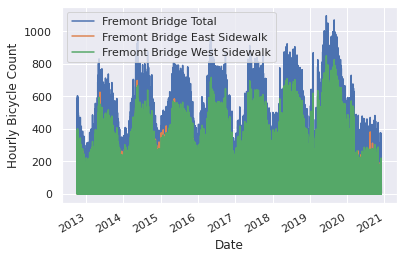

In [40]:
%matplotlib inline
data.plot()
plt.ylabel('Hourly Bicycle Count');

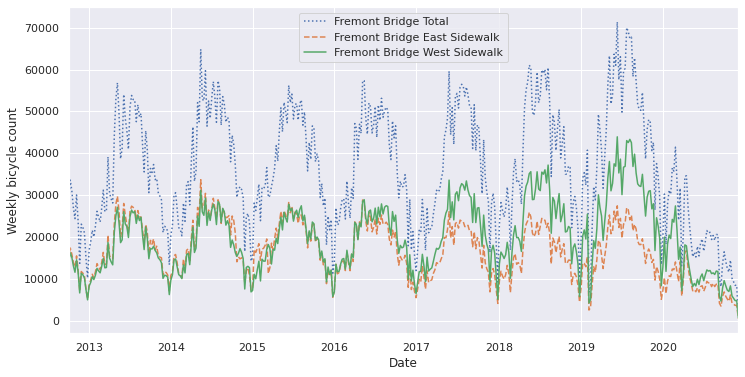

In [58]:
weekly = data.resample("W").sum()
weekly.plot(style=[":","--","-"], figsize=(12,6))
plt.ylabel('Weekly bicycle count');

<AxesSubplot:xlabel='Date'>

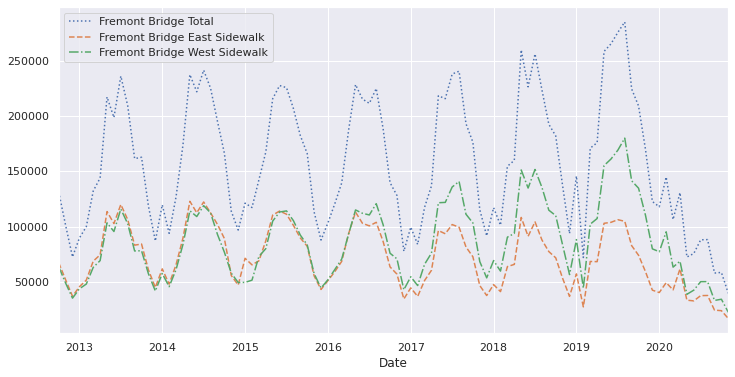

In [59]:
monthly = data.resample("M").sum()
monthly.plot(style=[":","--","-."], figsize=(12,6))

Text(0, 0.5, 'Quarterly bycicle count')

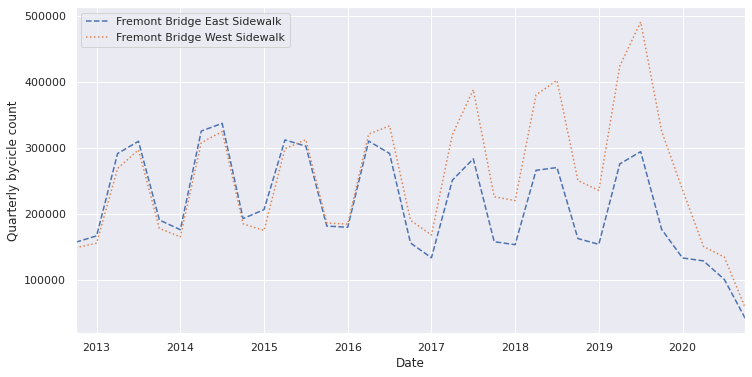

In [60]:
quarterly = data.resample("Q").sum()
quarterly.drop("Fremont Bridge Total",axis=1).plot(style=["--",":"], figsize=(12,6))
plt.ylabel("Quarterly bycicle count")

<AxesSubplot:xlabel='Date'>

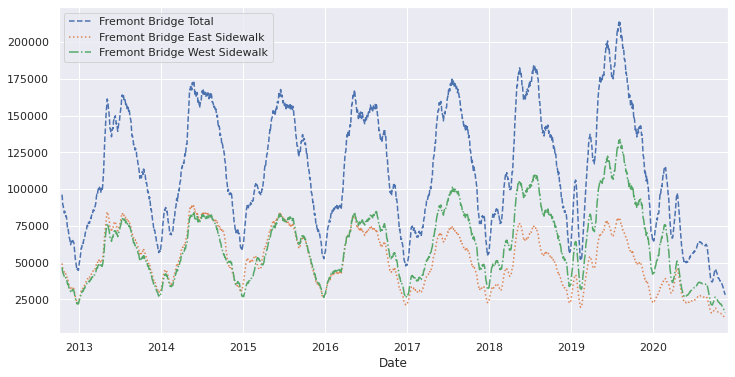

In [66]:
daily = data.resample("D").sum()
daily.rolling(30,center=True, win_type="gaussian").sum(std=10).plot(style=["--",":","-."],figsize=(12,6))

### Digging into the data

<AxesSubplot:xlabel='time'>

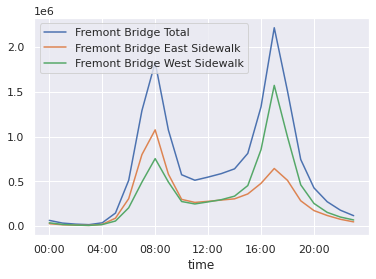

In [74]:
by_time = data.groupby(data.index.time).sum()
hourly_ticks = 60 * 60 * 4 * np.arange(6)
by_time.plot(xticks=hourly_ticks)

<AxesSubplot:>

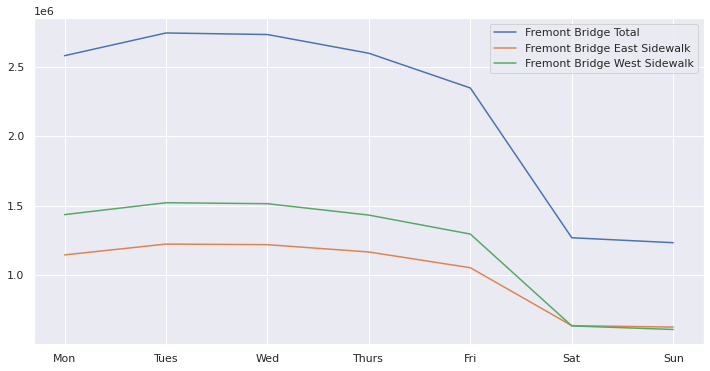

In [81]:
by_weekday = data.groupby(data.index.dayofweek).sum()
by_weekday.index =['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(figsize=(12,6))

This shows a strong distinction between weekday and weekend totals, with around
twice as many average riders crossing the bridge on Monday through Friday than on
Saturday and Sunday.

<AxesSubplot:title={'center':'Weekend'}, xlabel='time'>

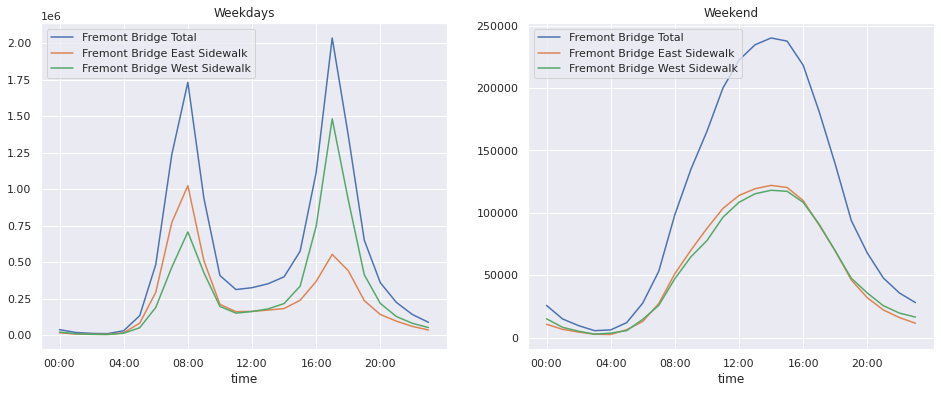

In [106]:
weekend = np.where(data.index.weekday < 5 , "Weekday","Weekend")

fig,ax = plt.subplots(1,2,figsize=(16,6))
by_time.loc["Weekday"].plot(ax=ax[0],title="Weekdays",xticks=hourly_ticks)
by_time.loc["Weekend"].plot(ax=ax[1],title="Weekend",xticks=hourly_ticks)